## Geophysical Data Analysis: Discrete Inverse Theory
### William Menke
Third Edition  
Transcribed and translated (from Matlab to Python) by Joshua Poirier

## Chaper 00
# Introduction

### I.3 A very quick Python tutorial

Let's type today's date.

In [1]:
import datetime

# print today's date
print(datetime.date.today())

2016-07-20


Now let's look at the commands for some simple arithmetic and algebra which closely parallel standard mathematical notation.

In [1]:
# input variables
a = 4.5
b = 5.1

# simple equation
c = a + b

# output result
print(c)

9.6


Similarly, now let's look at somewhat more complicated formula with a square root.  This syntax differs from standard mathematical notation.

In [2]:
import math

# input variables
a = 6
b = 8

# somewhat more complicated formula
c = math.sqrt(a**2 + b**2)

# output result
print(c)

10.0


Now a final somewhat more complicated formula using the **sin** function.

In [3]:
# input variables
n = 3
x = 4
x0 = 1
L = 6

c = math.sin(n * math.pi * (x-x0) / L)

print(c)

-1.0


### I.4 Review of vectors and matrices and their representation

In [4]:
import numpy as np

# define row and column-based vectors
r = np.array([2, 4, 6])
c = np.array([1, 3, 5])
c.shape = (3,1)

# print the vectors
print("Row-based vector:")
print(r)
print("")
print("Column-based vector:")
print(c)

Row-based vector:
[2 4 6]

Column-based vector:
[[1]
 [3]
 [5]]


Note how the column-based vector has vector elements.  This is necessary to enforce the column-wise dimension.  Next, let's print the second element from each vector.  Note how the column-based vector syntax differs from the row-based vector syntax, and that Python uses zero-indexing for vectors (first element is index 0, second element is index 1, etc.).

In [5]:
# print the second element of each vector
print("Second element of row-based vector:")
print(r[1])
print("")
print("Second element of column-based vector:")
print(c[1][0])

Second element of row-based vector:
4

Second element of column-based vector:
3


In the simplest interpretation, a *matrix* is just a rectangular table of numbers.  Let's build a square matrix, printing both it and its transpose.

In [6]:
# build matrix
M = np.array([(1,2,3),(4,5,6),(7,8,9)])

# output matrix and its transpose
print("Matrix M:")
print(M)
print("")
print("Matrix M transposed:")
print(np.transpose(M))

Matrix M:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Matrix M transposed:
[[1 4 7]
 [2 5 8]
 [3 6 9]]


Now let's try some matrix arithmetic.  In order to be added, the two matrices (or vectors) must have the same number of rows and columns.  Their sum is then just the matrix that results from summing their corresponding elements.

In [7]:
# build matrices
M = np.array([(1,0,2), (0,1,0), (2,0,1)])
N = np.array([(1,0,-1), (0,2,0), (1,0,3)])

# sum the matrices M and N
S = M + N

print("M + N =")
print(S)

M + N =
[[2 0 1]
 [0 3 0]
 [3 0 4]]


Subtraction is performed in an analogous manner.  Addition (and subtraction) are commutative and associative.  Multiplication of two matrices is a more complicated operation and requires that the number of columns of the left-hand matrix equal the number of rows of the right-hand matrix.  Thus, if the matrix **M** is *NxK* and the matrix **N** is *KxM*, the product **P**=**NM** is an *NxM* matrix.  Matrix multiplication is associative; however, it is not commutative.

In [8]:
# build matrices
M = np.array([(1,1,2,2),(2,2,3,3)])
N = np.array([(1,2),(2,1),(1,2),(2,1)])

# multiply the matrices M and N
Q = M.dot(N)

print("M * N =")
print(Q)

M * N =
[[ 9  9]
 [15 15]]


Any matrix is unchanged when multiplied by the *identify matrix*, conveniently denoted **I**.  This matrix has ones along its main diagonal, and zeroes elsewhere, as in:

In [9]:
# build 3x3 identity matrix
I = np.eye(3)

print("3x3 Identity matrix:")
print(I)

3x3 Identity matrix:
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


Python performs all multiplicative operations with ease.  For example, suppose we have vectors **a**, **b** (we'll use row-based vectors for coding convenience, reshaping/transposing as necessary), and matrices **M**, and **N** defined as:

\begin{equation*}
\mathbf{a} = \begin{pmatrix} 1 \\ 3 \\ 5 \end{pmatrix} 
\qquad \qquad
\mathbf{b} = \begin{pmatrix} 2 \\ 4 \\ 6 \end{pmatrix}
\end{equation*}


\begin{equation*}
\mathbf{M} = \begin{pmatrix}
1 & 0 & 2 \\
0 &  1 & 0 \\
2 &  0 & 1
\end{pmatrix}
\qquad \qquad
\mathbf{N} = \begin{pmatrix}
1 & 0 & -1 \\
0 & 2 & 0 \\
-1 & 0 & 3
\end{pmatrix}
\end{equation*}

In [10]:
# build vectors and matrices
a = np.array([1,3,5])
b = np.array([2,4,6])
M = np.array([(1,0,2),(0,1,0),(2,0,1)])
N = np.array([(1,0,-1),(0,2,0),(-1,0,3)])

Let's use Python (and the Numpy package) to calculate the following.

\begin{equation*}
s = \mathbf{a} \mathbf{b}^T = 
\begin{pmatrix} 1 & 3 & 5 \end{pmatrix}  \begin{pmatrix} 2 \\ 4 \\ 6 \end{pmatrix} =
2 \times 3 + 3 \times 4 + 5 \times 6 = 44
\end{equation*}

In [11]:
s = np.vdot(a,b)
print(s)

44


Now let's compute **a<sup>T</sup>b**.  Note that we need to reshape **a** to be a column-based vector.

\begin{equation*}
\mathbf{T} = \mathbf{a}^T \mathbf{b} = 
\begin{pmatrix} 1 \\ 3 \\ 5 \end{pmatrix}  \begin{pmatrix} 2 & 4 & 6 \end{pmatrix} =
\begin{pmatrix} 
2 \times 1 & 4 \times 1 & 6 \times 1 \\
2 \times 3 & 4 \times 3 & 6 \times 3 \\
2 \times 5 & 4 \times 5 & 6 \times 5 \end{pmatrix} =
\begin{pmatrix}
2 & 4 & 6 \\
6 & 12 & 18 \\
10 & 20 & 30 \end{pmatrix}
\end{equation*}

In [12]:
T = a.reshape(3,1) * b
print(T)

[[ 2  4  6]
 [ 6 12 18]
 [10 20 30]]


Now let's bring a matrix into the mix!

\begin{equation*}
\mathbf{c} = \mathbf{M} \mathbf{a}^T = 
\begin{pmatrix} 
1 & 0 & 2 \\
0 & 1 & 0 \\
2 & 0 & 1
\end{pmatrix} 
\begin{pmatrix} 1 \\ 3 \\ 5 \end{pmatrix} =
\begin{pmatrix} 
1 \times 1 + 0 \times 3 + 2 \times 5 \\
0 \times 1 + 1 \times 3 + 0 \times 5 \\
2 \times 1 + 0 \times 3 + 1 \times 5
\end{pmatrix} =
\begin{pmatrix} 11 \\ 3 \\ 7 \end{pmatrix}
\end{equation*}

In [13]:
c = M.dot(a.reshape(3,1))
print(c)

[[11]
 [ 3]
 [ 7]]


And how about multiplying two matrices?

\begin{equation*}
\mathbf{P} = \mathbf{M} \mathbf{N} = 
\begin{pmatrix} 1 & 0 & 2 \\ 0 & 1 & 0 \\ 2 & 0 & 1 \end{pmatrix}
\begin{pmatrix} 1 & 0 & -1 \\ 0 & 2 & 0 \\ -1 & 0 & 3 \end{pmatrix} =
\begin{pmatrix} -1 & 0 & 5 \\ 0 & 2 & 0 \\ 1 & 0 & 1 \end{pmatrix}
\end{equation*}

In [14]:
P = M.dot(N)
print(P)

[[-1  0  5]
 [ 0  2  0]
 [ 1  0  1]]


In Python/Numpy, matrix multiplication (between matrix data types) is signified using the multiplication sign, *\** (the asterisk).  Sometimes we may want to violate the rules and multiply the items element-wise.  To do this we perform the following:

In [15]:
D = np.multiply(M, N)
print(D)

[[ 1  0 -2]
 [ 0  2  0]
 [-2  0  3]]


Quick look at subsetting matrices given:

\begin{equation*}
\mathbf{a} = \begin{pmatrix} 1 \\ 2 \\ 3 \end{pmatrix}
\qquad
\mathbf{M} = \begin{pmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9 \end{pmatrix}
\end{equation*}

Let's calculate:
\begin{equation*}
s = a_2 = 2
\qquad
t = M_{2,3} = 6
\qquad
\mathbf{b} = \begin{pmatrix} M_{1,2} & M_{2,2} & M_{3,2} \end{pmatrix} = \begin{pmatrix} 2 & 5 & 8 \end{pmatrix}
\end{equation*}

\begin{equation*}
\mathbf{c} = \begin{pmatrix} M_{2,1} & M_{2,2} & M_{2,3} \end{pmatrix} = \begin{pmatrix} 4 & 5 & 6 \end{pmatrix}
\qquad
\mathbf{T} = \begin{pmatrix} M_{2,2} & M_{2,3} \\ M_{3,2} & M_{3,3} \end{pmatrix} = \begin{pmatrix} 5 & 6 \\ 8 & 9 \end{pmatrix}
\end{equation*}

In [16]:
a = np.array([1, 2, 3]).reshape(3,1)
M = np.array([(1,2,3), (4,5,6), (7,8,9)])

# we need to use a second index because we're using a column-based array now
s = a[1,0]
print("s =", s)

t = M[1,2]
print("t =", t)

b = M[:,1]
print("b =", b)

c = M[2,:]
print("c =", c)

T = M[1:,1:]
print("T =", T)

s = 2
t = 6
b = [2 5 8]
c = [7 8 9]
T = [[5 6]
 [8 9]]


Matrix division is defined in analogy to reciprocals.  If *s* is a scalar number, then multiplication by the reciprocal $s^{-1}$ is equivalent to division by *s*.  Here, the reciprocal obeys $s^{-1}s=ss^{-1}=1$.  The matrix analog to the reciprocal is called the *matrix inverse* and obeys:
    
\begin{equation*}
\mathbf{A}^{-1} \mathbf{A} = \mathbf{A} \mathbf{A}^{-1} = \mathbf{I}
\end{equation*}

It is defined only for square matrices.  The calculation of the inverse of a matrix is complicated, and we will not describe it here, except to mention the 2x2 case:

\begin{equation*}
\begin{pmatrix} a & b \\ c & d \end{pmatrix}^{-1} =
\frac{1}{ad-bc} \begin{pmatrix} d & -b \\ -c & a \end{pmatrix}
\end{equation*}

The matrix inverse $\mathbf{A}^{-1}$ is only defined when a quantity called the *determinant* of **A** is not equal to zero.  The determinant of a square *NxN* matrix **M** is defined as:

\begin{equation*}
det(\mathbf{M}) = \displaystyle\sum_{i=1}^N \displaystyle\sum_{j=1}^N \displaystyle\sum_{k=1}^N \cdots \displaystyle\sum_{q=1}^N
\varepsilon^{ijk \cdots q} M_{1,i} M_{2,j} M_{3,k} \cdots M_{N,q}
\end{equation*}

Here the quantity $\varepsilon^{ijk \cdots q}$ is +1 when (*i*, *j*, *k*, $\cdots$, *q*) is an even permutation of (1, 2, 3, $\cdots$, *N*), -1 when it is an odd permutation and zero otherwise.  Note that the determinant of an *NxN* is the sum of products of *N* elements of the matrix.  In the case of a 2x2 matrix, the determinant contains products of two elements and is given by:

\begin{equation*}
det \begin{pmatrix} a & b \\ c & d \end{pmatrix} = ad - bc
\end{equation*}

Note that the reciprocal of the 2x2 determinant appears in the formula for the 2x2 matrix inverse, implying that this matrix inverse does not exist when the determinant is zero.  This is a general property of matrix inverses; they exist only when the matrix has nonzero determinant.

Consider a matrix **A** and vector **b** below, let's first calculate the inverse and determinant of **A**.

\begin{equation*}
\mathbf{A} = \begin{pmatrix} 1 & 5 & 13 \\ 2 & 7 & 17 \\ 3 & 11 & 19 \end{pmatrix}
\qquad
\mathbf{b} = \begin{pmatrix} 1 \\ 2 \\ 3 \end{pmatrix}
\end{equation*}

In [17]:
from numpy.linalg import inv, det

A = np.array([(1,5,13),(2,7,17),(3,11,19)])
b = np.array([1,2,3])

B = inv(A)
print("B =")
print(B)

print("")

d = det(A)
print("d =")
print(d)

B =
[[-2.25        2.         -0.25      ]
 [ 0.54166667 -0.83333333  0.375     ]
 [ 0.04166667  0.16666667 -0.125     ]]

d =
24.0


In many of the formulas of inverse theory, the matrix inverse either premultiplies or postmultiplies other quantities, for instance:

\begin{equation*}
\mathbf{c} = \mathbf{A}^{-1} \mathbf{b}
\qquad
\mathbf{D} = \mathbf{B} \mathbf{A}^{-1}
\end{equation*}

These cases do not actually require the explicit calculation of $\mathbf{A}^{-1}$, just the combinations of $\mathbf{A}^{-1} \mathbf{b}$ and $\mathbf{B} \mathbf{A}^{-1}$, which are computationally simpler.  Let's calculate **c** and **D** from above.

In [18]:
# calculate the vector c, and double-check its value
c = np.round(np.linalg.solve(A, b), decimals=10)
assert np.allclose(b, A.dot(c)), "Error: Ac != b"
print("c =")
print(c)

print("")

# calculate the matrix D, and double-check its value
D = np.round(np.linalg.solve(A, B), decimals=10)
assert np.allclose(B, A.dot(D)), "Error: AD != B"
print("D =")
print(D)

c =
[ 1.  0.  0.]

D =
[[ 6.13541667 -6.20833333  1.34375   ]
 [-1.65451389  1.84027778 -0.49479167]
 [-0.00868056 -0.07638889  0.06770833]]


A surprising amount of information on the structure of a matrix can be gained by studying how it affects a column vector that it multiplies.  Suppose that **M** is an *NxN* square matrix and that it multiplies an *input* column vector, **v**, producing an *output* column vector, **w=Mv**.  We can examine how the output **w** compares to the input **v** as **v** is varied.  One question of particular importance is "When is the output parallel to the input?"

This question is called the *algebraic eigenvalue problem*.  If **w** is parallel to **v**, then $\mathbf{w} = \lambda \mathbf{v}, where $\lambda$ is a scalar proportionality factor.  The parallel vectors satisfy the following equation:

\begin{equation*}
\mathbf{Mv} = \lambda \mathbf{v}
\qquad \text{or} \qquad
(\mathbf{M} - \lambda \mathbf{I}) \mathbf{v} = 0
\end{equation*}

The trivial solution $v=(M-\lambda I)^{-1}0=0$ is not very interesting.  A nontrivial solution is only possible when the matrix inverse $(M-\lambda I)^{-1}$ does not exist.  This is the case where the parameter $\lambda$ is specifically chosen to make the determinant $\text{det}(M-\lambda I)$ exactly zero, since a matrix with zero determinant has no inverse.  The determinant is calculated by adding together terms, each of which contains the product of *N* elements of the matrix.  Since each element of the matrix contains, t most, one instance of $\lambda$, the product will contain powers of $\lambda$ up to $\lambda^N$.  Thus, the equation, $\text{det}(M-\lambda I)=0$, is an *N*th order polynomial equation for $\lambda$.  An *N*th order polynomial equation has *n* roots, so we conclude that there must be *N* different proportionality factors, say $\lambda_i$, and *N* corresponding column vectors, say $\mathbf{v}^{(i)}$, that solve $\mathbf{Mv}^{(i)}=\lambda_i \mathbf{v}^{(i)}$.  The column vectors, $\mathbf{v}^{(i)}$, are called the *eigenvectors* of the matrix, **M**, and the proportionality factors, $\lambda_i$, are called the *eigenvalues*.  Eigenvectors are determined only up to an arbitrary multiplicative factor *s*, since if $\mathbf{v}^{(i)}$ is an eigenvector, so is $s \mathbf{v}^{(i)}$.  Consequently, they are conventionally chosen to be unit vectors.

In the special case where **M** is symmetric, it can be shown that the eigenvalues are real and the eigenvectors are mutually perpendicular, $\mathbf{v}^{(iT)} \mathbf{v}^{(j)}=0 \text{for } i \neq j$.  The *N* eigenvalues can be arranged into a diagonal matrix, $\Lambda$, whose elements are $[\Lambda]_{i,j}=\lambda_i \delta_{i,j}$, where $\delta_{i,j}$ is the Kronecker delta.  The corresponding *N* eigenvectors can be arranged as the columns of an *NxN* matrix **V**, which satisfies $\mathbf{V}^T \mathbf{V} = \mathbf{V} \mathbf{V}^T = \mathbf{I}$.  The eigenvalue equation can then be succinctly written as:

\begin{equation*}
\mathbf{MV} = \mathbf{V} \Lambda
\qquad \text{or} \qquad
\mathbf{M} = \mathbf{V} \Lambda \mathbf{V}^T
\end{equation*}

(The second equation is derived from the first by postmultiplying it by $\mathbf{V}^T$.)  Thus, the symmetric matrix **M** can be reconstructed from its eigenvalues and eigenvectors.  Let's calculate the eigenvalues and eigenvectors for the matrix **M**.

\begin{equation*}
\mathbf{M} = \begin{pmatrix} 1 & 2 & 0 \\ 2 & 2 & 0 \\ 0 & 0 & 4 \end{pmatrix}
\end{equation*}

In [19]:
M = np.array([(1,2,0), (2,2,0), (0,0,4)])
w, v = np.linalg.eig(M)

print("Eigenvalues: ", w)

print("")

print("Eigenvectors: ")
print(v)

assert v[:,0].dot(v[:,0]) == 1, "Orthonomality failed: First eigenvector not length 1"
assert v[:,1].dot(v[:,1]) == 1, "Orthonomality failed: Second eigenvector not length 1"
assert v[:,2].dot(v[:,2]) == 1, "Orthonomality failed: Third eigenvector not length 1"
assert v[:,0].dot(v[:,1]) == 0, "Orthonomality failed: First and second eigenvectors not orthogonal"
assert v[:,0].dot(v[:,2]) == 0, "Orthonomality failed: First and third eigenvectors not orthogonal"
assert v[:,1].dot(v[:,2]) == 0, "Orthonomality failed: Second and third eigenvectors not orthogonal"

Eigenvalues:  [-0.56155281  3.56155281  4.        ]

Eigenvectors: 
[[-0.78820544 -0.61541221  0.        ]
 [ 0.61541221 -0.78820544  0.        ]
 [ 0.          0.          1.        ]]


### I.5 Useful Python Operations

#### I.5.1 Loops

*Python* provides a looping mechanism, the $\text{for}$ command, which can be useful when the need arises to sequentially access the elements of vectors and matrices.  Let's copy the diagonal elements of matrix **M** to the vector **a**, such that $a_i = M_{i,i}$.

\begin{equation*}
\mathbf{M} = \begin{pmatrix} 1 & 4 & 7 \\ 2 & 5 & 8 \\ 3 & 6 & 9 \end{pmatrix}
\qquad \text{results in} \qquad
\mathbf{a} = \begin{pmatrix} 1 \\ 5 \\ 9 \end{pmatrix}
\end{equation*}

In [20]:
# create matrix and initialize vector
M = np.array([(1,4,7), (2,5,8), (3,6,9)])
a = np.zeros(3)

# loop through items along M's diagonal - copy values to vector 'a'
for i in range(0, 3):
    a[i] = M[i,i]

# print vector a
print("a = ", a)

a =  [ 1.  5.  9.]


Similarly, this can be accomplished more simply using the $\text{numpy.diagonal}$ function.

In [21]:
# re-initialize the vector
a = np.zeros(3)

# extract diagonal
a = np.diagonal(M)

print("a = ", a)

a =  [1 5 9]


#### I.5.2 Loading data from a file
*Python* can read and write files with a variety of formats, but we start here with the simplest and most common, the text file.  As an example, we load a global temperature dataset compiled by NASA.

In [24]:
import pandas as pd

df = pd.read_csv("../data/global_temp.txt", delim_whitespace=True, header=None, names=["Year", "TempChange"])
df.head()

,Year,TempChange
0,1965,-0.11
1,1966,-0.03
2,1967,-0.01
3,1968,-0.04
4,1969,0.08


#### I.5.3 Plotting data
Now let's plot the global temperature data we imported above.

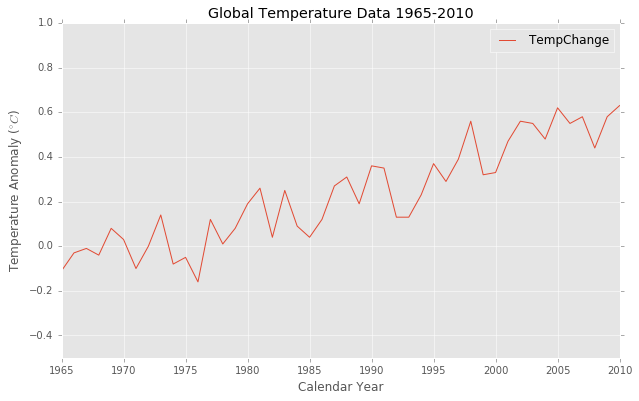

In [25]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

df.plot(x='Year', y='TempChange', figsize=(10,6))
plt.xlim(1965, 2010)
plt.ylim(-0.5, 1.0)
plt.xlabel('Calendar Year')
plt.ylabel('Temperature Anomaly ($^{\circ}C$)')
plt.title('Global Temperature Data 1965-2010')

#### I.5.4 Creating character strings containing values of variables
The results of computations are most understandable if described in a combination of words and numbers.  *Python* allows for values to be embedded into strings (including plot labels).  For example, let's print out the temporal range of the global temperature data set in a sentence.

In [26]:
# get number of rows in data frame
n = df.shape[0]

print ("The global temperature data begins for the year %s and ends for the year %s." % (df.Year[0], df.Year[n-1]))

The global temperature data begins for the year 1965 and ends for the year 2010.
